# Linear Discriminant Analysis
Redução de dimensionalidade e classificação.

O problema da redução de dimensionalidade consiste em encontrar uma matriz de projeção $W$ *L X D* tal que um ponto **$x$** com *D* features seja projetado num espaço *L* dimensional. Trabalhar em menos dimensões permite acelerar a execução de modelos e também eliminar dados irrelevantes, aumentando a precisão, além de permitir visualização da informação, caso *L* <= 3.

Aqui abordaremos o LDA (*Linear Discriminant Analysis*) e o LDA de Fisher como modelo de classificação e redução de dimensionalidade. Começando pelo caso de duas classes e projeção em um vetor ($L = 1$) e partindo depois para um caso mais geral.

O LDA, diferentemente de outros métodos como o PCA, é um modelo de redução de dimensionalidade supervisionado, que considera as classes das observações ao buscar a melhor projeção, sendo assim apropriado para problemas de classificação.

## Primeiro caso

Começaremos com a seguinte situação: seja $\mathbf{X} = (X_1, ... ,X_n)$ o vetor (matriz) de observações num espaço bi-dimensional, divididas nas classes 1 e 2. Buscamos um vetor $l$ no qual serão projetadas as observações de $\mathbf{X}$. Sendo assim, denotaremos como $\mathbf{Y} = l\mathbf{X}$ o vetor das projeções, $\mathbf{Y_1}$ as projeções da classe 1 e $\mathbf{Y_2}$ as projeções da classe 2.

O LDA busca a projeção que maximize a distância entre as médias das projeções e minimize a variância.

Introduziremos as seguintes notações:
$$
\begin{align}
u_k &= \frac{1}{N_k}\sum{x_k^{(i)}}  \text{(média das observações da classe k)} \\
m_k &= \frac{1}{N_k}\sum{y_k^{(i)}} \text{(média das projeções da classe k)} \\
s^2_k &= \frac{1}{N_k}\sum{(y_k^{(i)} - m_k)^2} & \text{(variância dentro da classe k)} \\
\end{align}
$$
Note que nas equações a seguir vv^T denota o produto externo
$$
\begin{align}
S_k = \sum{(x_k^{(i)} - u_k)(x_k^{(i)} - u_k)^T} &\text{(matriz de dispersão(variância amostral) dentro da classe k)} \\
S_W = \sum{S_k}  &\text{(Matriz de dispersão(variância amostral) combinada)} \\
S_B = (u_1 - u_2)(u_1 - u_2)^T  &\text{(Matriz de dispersão(variância amostral) entre as classes)} \\ 
\end{align}
$$


Assim, nosso problema se torna maximizar a seguinte razão:
$$
\begin{equation}
\frac{||m_1 - m_2||^2}{s_1^2 + s_2^2}
\end{equation}
$$
Que pode ser reescrita:
$$
\begin{align}
\frac{||m_1 - m_2||^2}{s_1^2 + s_2^2} &= \frac{l^T(u_1 - u_2)^2}{l^TS_1l + l^TS_2l} = \\
J(l) &= \frac{l^TS_Bl}{l^TS_Wl}
\end{align}
$$

Assim, reescrevemos a razão como função do vetor $l$, podendo maximizá-la por métodos tradicionais do cálculo diferencial. Aqui, não serão explicitados todos os passos da manipulação, pois foge ao escopo desse trabalho.

$$
\begin{align}
&\frac{\partial J(l)}{\partial l} = 0 \\
&l = \frac{c}{J}S_W^{-1}(u_2 - u_1)\quad \text{Onde c e J são escalares.} \\
&\text{Logo, a direção do vetor é dada por:} \\
&l = S_W^{-1}(u_2 - u_1)
\end{align}
$$

Para realizar a redução de dimensionalidade, paramos neste resultado conhecido como Discriminante Linear de Fischer, para utilizar esse modelo para classificação, é necessário criar um limiar de classificação linear, que consiste em atribuir a uma observação a classe cuja média está mais próxima. O que é simples e rápido, porém um pouco limitado, por isso o LDA de Fischer é frequentemente utilizado para a redução de dimensionalidade.


[ True  True  True  True False  True False False False False False False
  True  True  True  True  True  True False False  True  True False  True
 False  True  True  True False False  True False False False  True False
  True  True False False  True  True False False False  True False False
 False  True]
[False False False False  True False  True  True  True  True  True  True
 False False False False False False  True  True False False  True False
  True False False False  True  True False  True  True  True False  True
 False False  True  True False False  True  True  True False  True  True
  True False]


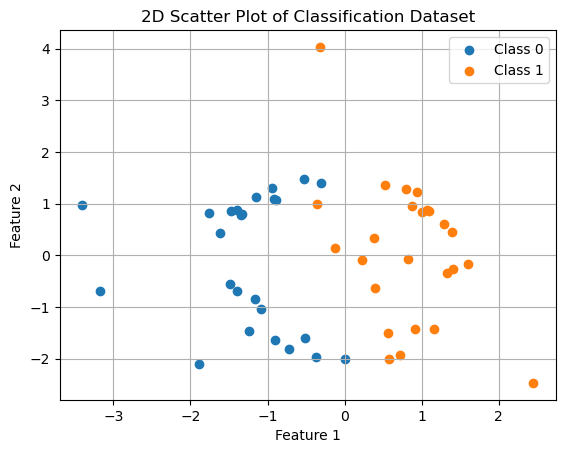

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np
x, y = make_classification(50, 2, n_redundant=0, n_repeated=0)
for class_label in np.unique(y):
    # Select points for each class
    class_points = x[y == class_label]
    plt.scatter(class_points[:, 0], class_points[:, 1], label=f"Class {class_label}")

# Adding labels and legend
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("2D Scatter Plot of Classification Dataset")
plt.legend()
plt.grid(True)
plt.show()



In [22]:
x1 = []
x2 = []
for i in range(x.shape[0]):
    if y[i] == 0:
        x1.append(i)
    else:
        x2.append(i)
x1 = np.array(x1)
x2 = np.array(x2)
u1 = np.mean(x[x1], 0)
u2 = np.mean(x[x2], axis=0)

In [34]:
s1 = np.cov(x[x1], rowvar=False)
s2 = np.cov(x[x2], rowvar=False)
spooled = (x1.shape[0]/x.shape[0])* s1 + (x2.shape[0]/x.shape[0])* s2
spooled.shape

(2, 2)

In [38]:
l = np.linalg.inv(spooled) @ (u1 - u2)
l

array([ 1.00734838, -3.54654275])

In [ ]:
projection = l @ x.T
projection

[7.71326805 2.58330414 1.46804529 2.43511024 2.56500273 6.31244906
 0.38015062 2.85637873 3.83840294 4.8863238  3.93375229 2.72064652
 4.51214089 2.13106088 4.60375323 3.36076769 3.79093544 8.78055647
 4.37281631 2.69160793 1.7462576  8.8675343  1.26227751 1.69477402
 7.26243905]
[ -1.87161414  -3.51508591  -6.09110495  -5.82593457  -6.39135598
  -3.89913308  -7.17891659   3.06907533  -3.67315354 -12.49194058
  -5.51600642  -1.17544887  -5.95994863  -2.77250163  -1.59212754
  -4.95658441  -6.44191361  -1.29701861  -4.68864857  -7.69066302
  -7.84569401  -0.80455565  -6.92730394  -5.28591065   1.75121766]


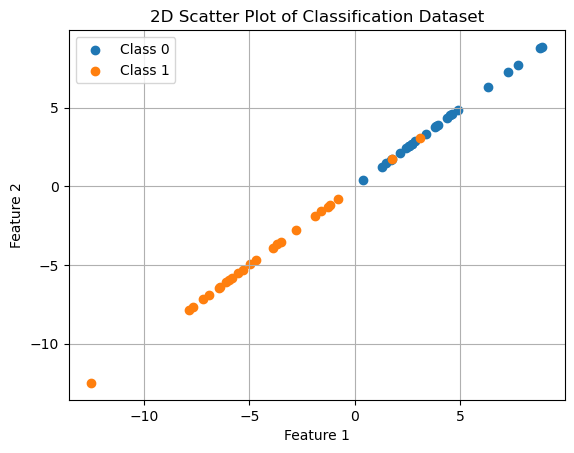

In [46]:


for class_label in np.unique(y):
    # Select points for each class
    class_points = projection[y == class_label]
    print(class_points)
    plt.scatter(class_points[:], class_points[:], label=f"Class {class_label}")

# Adding labels and legend
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("2D Scatter Plot of Classification Dataset")
plt.legend()
plt.grid(True)
plt.show()

## Segundo caso: generalização

Agora, nosso objetivo passa a ser encontrar uma matriz de projeção $W$ cujas colunas $\{w_1, ..., w_L\}$ são os vetores onde serão projetadas as observações. Algumas definições são alteradas:
$$
\begin{align}
u &= \frac{1}{N}\sum{x^{(i)}}\quad \text{(Média de todas as observações)} \\
S_W &= \sum_{k=1}^{|C|}N_k{\sum_{x \in C_k}{(x - u_k)(x - u_k)^T}} \quad\text{(Matriz de dispersão(variância amostral) combinada)} \\
S_B &= \sum_{k=1}^{|C|}{\frac{N_k}{N}(u_k - u)(u_k - u)^T}\quad\text{(Matriz de dispersão(variância amostral) entre as classes)} \\ 
\end{align}
$$

E o problema de otimização se torna:
$$
\begin{equation}
J(W) = \frac{|WS_BW^T|}{|WS_WW^T|}
\end{equation}
$$

O que pode ser resolvido como um problema de autovalores generalizado, cuja solução implica que as colunas de W serão os $L$ principais autovetores de $S_W^{-1}S_B$, ou em notação equivalente, utilizada por Murphy et. al., $W = S_W^{\frac{-1}{2}}U$, onde U é composta pelos $L$ autovetores principais de $S_W^{\frac{-1}{2}}S_BS_W^{\frac{-1}{2}}$. Isto assume que a matriz seja invertível.

Note que o LDA está limitado a reduzir a dimensão do espaço de features a no máximo C - 1 dimensões, onde C é o número de classes, o que está evidenciado pela dimensão da matriz $S_B$.

In [ ]:
from sklearn.datasets import load_iris

x, y = load_iris(return_X_y=True)


u = []
class_count = []
for c in np.unique(y):
    u.append(np.mean(x[y==c], axis=0))
    class_count.append(x[y==c].shape[0])
u = np.array(u)
u_all = np.mean(x, axis=0)

[[5.006 3.428 1.462 0.246]
 [5.936 2.77  4.26  1.326]
 [6.588 2.974 5.552 2.026]] [50, 50, 50]


In [ ]:
Sb = np.sum([np.outer(ui - u_all, ui - u_all) * class_count[i] for i, ui in enumerate(u)], axis=0) / x.shape[0]
Sc = [np.sum([np.outer(xi - u[i], xi - u[i]) for xi in x[y==i]], axis=0) / class_count[i] for i in range(len(class_count))]
Sw = np.sum([sc * (class_count[i]/ x.shape[0])   for i, sc in enumerate(Sc)], axis=0)


array([[0.259708  , 0.09086667, 0.164164  , 0.03763333],
       [0.09086667, 0.11308   , 0.05413867, 0.032056  ],
       [0.164164  , 0.05413867, 0.181484  , 0.041812  ],
       [0.03763333, 0.032056  , 0.041812  , 0.041044  ]])

In [ ]:
eigenvalues, eigenvectors = np.linalg.eigh(Sw)
Sw_inv_sqrt = eigenvectors @ np.diag(1 / np.sqrt(eigenvalues)) @ eigenvectors.T
Sw_inv_sqrt

array([[ 2.90915638, -0.79545379, -1.39344601,  0.1648808 ],
       [-0.79545379,  3.60933532,  0.10728579, -0.92347606],
       [-1.39344601,  0.10728579,  3.50506057, -0.92324027],
       [ 0.1648808 , -0.92347606, -0.92324027,  5.98251367]])

In [86]:
m = Sw_inv_sqrt @ Sb @ Sw_inv_sqrt
eigenvalues, eigenvectors = np.linalg.eig(m)
U = eigenvectors[:, :2]
W = Sw_inv_sqrt @ U
W
x.shape

(150, 4)

[[-6.01716893  7.03257409]
 [-5.0745834   5.9344564 ]
 [-5.43939015  6.46102462]
 [-4.75589325  6.05166375]
 [-6.08839432  7.24878907]
 [-5.65366246  8.20566459]
 [-5.15936541  7.08855228]
 [-5.55602799  6.71735148]
 [-4.50067925  5.70363331]
 [-5.291132    5.77216652]
 [-6.35616273  7.38303921]
 [-5.16611245  6.61834385]
 [-5.27470297  5.64522043]
 [-5.52287187  5.91546178]
 [-7.82336533  8.33114171]
 [-7.12473969  9.49449347]
 [-6.54308629  8.58221762]
 [-5.73326956  7.31937537]
 [-6.03389602  7.70751769]
 [-5.97592917  7.8811861 ]
 [-5.44643525  6.5388137 ]
 [-5.53702462  7.94933772]
 [-6.64269897  7.61560336]
 [-4.1883926   7.17326384]
 [-4.49904458  6.33592908]
 [-4.71365129  5.74861457]
 [-4.76587331  7.19681579]
 [-5.87859277  6.94087051]
 [-5.94594353  6.81635911]
 [-4.77232228  6.17860984]
 [-4.70109689  5.96239486]
 [-5.32334844  7.30069279]
 [-7.09252325  7.96596721]
 [-7.43732441  8.57286047]
 [-5.00723264  6.05896781]
 [-5.91308548  6.56246693]
 [-6.57464406  7.13645108]
 

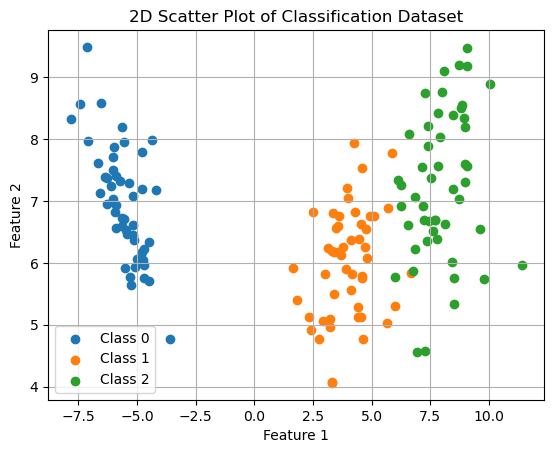

In [89]:
projection = np.transpose(W.T @ x.T)

for class_label in np.unique(y):
    # Select points for each class
    class_points = projection[y == class_label]
    print(class_points)
    plt.scatter(class_points[:, 0], class_points[:, 1], label=f"Class {class_label}")

# Adding labels and legend
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("2D Scatter Plot of Classification Dataset")
plt.legend()
plt.grid(True)
plt.show()

## Referências
MURPHY, Kevin P. Machine Learning: A Probabilistic Perspective. [S. l.]: MIT Press, 2012. 1104 p. ISBN 9780262304320.